# Введение в анализ данных (первый семестр)


Данные взяты с https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings


**Задачи:**

**1.** Оценить, как ведет себя рынок видеигр в целом. 

**2.** Рассмотреть отличия "больших" компаний от "маленьких".

**3.** Оценить востребованность разных поколений консолей.

In [3]:
%autosave 30
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency


Autosaving every 30 seconds


In [4]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Фичи:
****Name**** - имя игры 

****Platform**** - игровая платформа для которой игра была выпущена

****Year_of_Realeas**** - год выпуска игры

****Genre**** - жанр игры

****Publisher**** - компания выпустившая игру

****NA_Sales**** - продажи в Северной Америке

****EU_Sales**** - продажи в Европе

****JP_Sales**** - продажи в Японии

****Other_Sales**** - продажи в других местах

****Global_Sales**** - продажи по всему миру

****Critic_Score**** - оценка игровых критиков

****Critic_Count**** - количество критиков, поставивших оценку

****User_Score**** - оценка игроков

****User_Count**** - количество игроков поставивших оценки

****Developer**** - разработчик игры

****Rating**** - возрастной рейтинг

In [5]:
print(df.shape)
df.info()

(16719, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [6]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [7]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce') #Так как изначально тип object

Заметим, что признаки Critic_Count и User_Count имеют большое количество пропусков(~50%). Отбросим эти столбцы. Столбцы с оценками оставим(так как могут понадобиться при предсказании).

In [8]:
df = df.drop(['User_Count', 'Critic_Count'], axis=1)

Уберем столбец **Deveoloper**, так как в основном, самые популярные и продаваемые игры создаются в компаниях, которые пренадлежат крупным издательствам(не будем брать в расчет инди-игры, так как инди разработчики не могут создавать много игр одновременно, так как это инди-разработчик, значит у них в арсенале не будет много игровых франшиз + во многих случаях, инди игры издаются самой компанией разработчиком, соответственно, надобность в столбце **Developer** отпадает.
Так же бывает так, что начинающие команды по разработке игр берут под крыло "большие" компании, что так же влияет на продажи (то есть, люди покупают игру от неизвестных разработчиков больше из-за издателя). Бывают случаи, когда появляются инди-разработчики из "старожил" игровой индустрии, но в этом случае так же игры издаются крупными компаниями (за пример можно взять Obsidian Entertainment)). Так же, издатель отвечает за рекламу продукта, что очень сильно влияет на продажи. Поэтому важность издателя > важность разработчика.


In [9]:
df = df.drop(['Developer'], axis=1)

В данном датасете имеются игры с годом выпуска >2016, то есть, это игры, которые предзаказали. Отбросим эти игры.

In [143]:
df = df.drop(df[df['Year_of_Release'] > 2016.0].index)

Рассмотрим самое основное: продажи и количество релизов по годам.

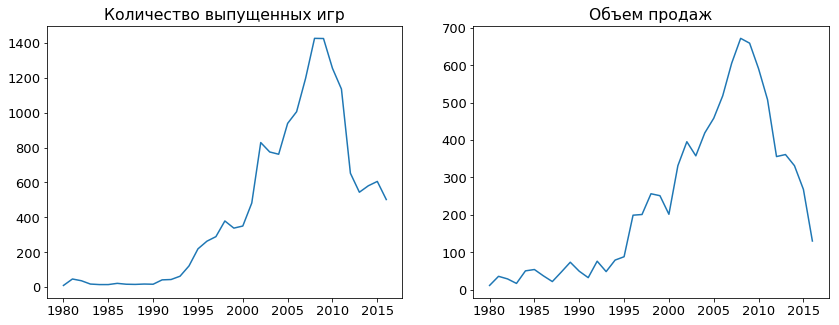

In [137]:
games = df['Year_of_Release'].value_counts().sort_index()
sales = df.groupby(by='Year_of_Release')['Global_Sales'].sum()

fig = plt.figure(figsize= (14,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(games)
ax1.set_title('Количество выпущенных игр')
ax2.plot(sales)
ax2.set_title('Объем продаж')
plt.show()

Как видно - изначально спрос на игры рос вместе с количеством выпускаемых игр, но после 2009 игры стали продаваться меньше, возможно это связано с кризисом и уменьшением покупательской способности. Виднен небольшой подъем количества выпущенных игр в 2015 году, но не смотря на это, спрос продалжает падать. Скорее всего это связано с ростом интиреса к другим развлекательным отраслям (кино, сериалы (из примеров: киновселенная марвела появилась на свет в 2008 году, сериал "игра престолов" в 2011)).

Дальше взглянем на то, какикие результаты показывают первые 10 компаний по количеству выпущенных игр.

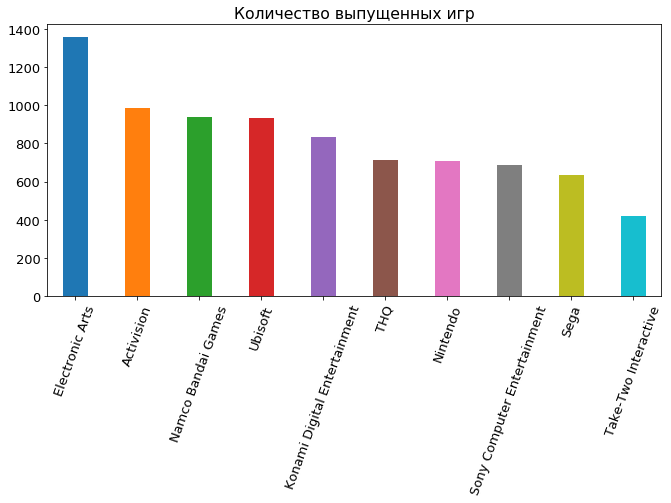

In [142]:
x = df['Publisher'].value_counts()[:10]

#plt.rcParams['font.size'] = 13 

fig = plt.figure(figsize=(11,5))

ax = x.plot.bar(rot=70, width=0.4)
ax.set_title('Количество выпущенных игр')
plt.show()

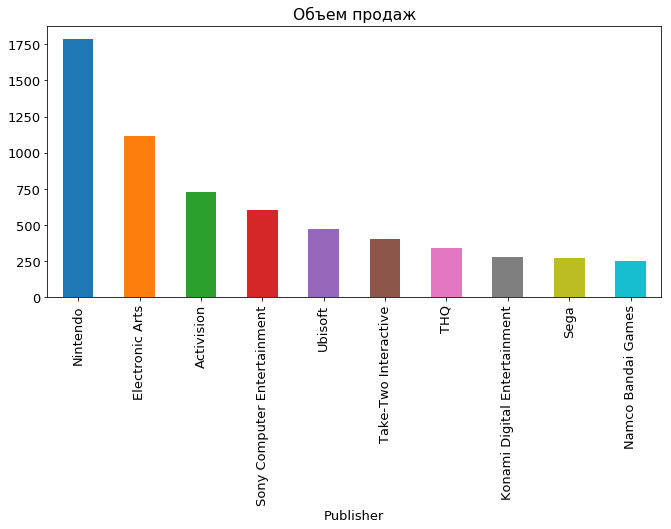

In [140]:
sales = df.groupby(by='Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10]
fig = plt.figure(figsize=(11,5))
ax = sales.plot(kind='bar')
ax.set_title('Объем продаж')
plt.show()

Интуитивно можно было предположить, что компании с самым большим количеством выпущенных игр имеют больше всех продаж. Но, как мы видим, предположение не совсем верно (хотя, первые 10 компаний имеют +- одинаковое количество игр(не считая EA), но в продажах отличие более явное). Возможно, это может быть связано с самими играми и платформами, на которые были выпущены игры.

Посмотрим на корреляцию признаков:

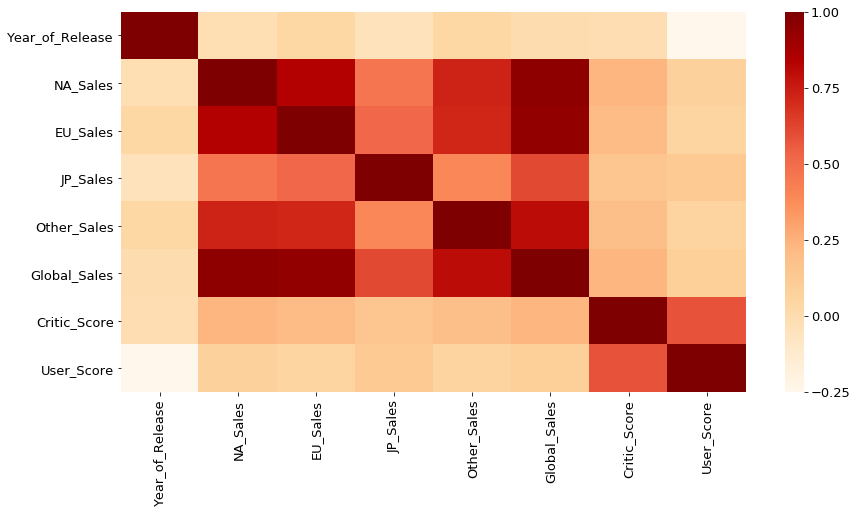

In [72]:
df_corr = df.drop(['Name', 'Platform', 'Genre', 
                   'Publisher', 'Rating'], axis=1)
fig = plt.figure(figsize= (14,7))
sns.heatmap(df_corr.dropna().corr(), 
            xticklabels = df_corr.columns.values,
            yticklabels = df_corr.columns.values, 
            cmap = 'OrRd')

Заметим, что оценка критиков и игроков не очень сильно коррелирует с продажами игры(скорее всего, связано с большим количеством пропусков).

Также год выпуска игры никак не связан с продажами, поэтому можно предположить, что компании умеют подстраиваться под количество спроса. (на графиках количества выпущенных игр и количества продаж была видна явная зависимость).

#### Сравнение 2-ух типов компаний.

Сейчас сравним компании, которые являются лидерами по продажам игр, с остальными компаниями. Попытаемся понять, какие компании ("большие" или "маленькие") какие жанры предпочитают, а так же попытаемся выявить причину успеха топовых компаний.

In [45]:
df_top_names = pd.DataFrame(df.groupby(by='Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:20])
df_top = df.loc[df.Publisher.isin(df_top_names.index)]

df_other_names = pd.DataFrame(df.groupby(by='Publisher')['Global_Sales'].sum().sort_values(ascending=False)[20:320])
df_other = df.loc[df.Publisher.isin(df_other_names.index)]

Соотношение по жанрам.

In [46]:
df_top_genre = pd.DataFrame(df_top.groupby(by='Genre')['Global_Sales'].sum().sort_values(ascending=False))
df_other_genre = pd.DataFrame(df_other.groupby(by='Genre')['Global_Sales'].sum().sort_values(ascending=False))

In [49]:
df_comb = pd.merge(df_top_genre, df_other_genre, on='Genre')
df_comb.rename(columns={'Global_Sales_x':'Global_Sales_Top',
                       'Global_Sales_y':'Global_Sales_other'}, 
                 inplace=True)

,Global_Sales_Top,Global_Sales_other
Genre,,
Action,1526.46,215.56
Sports,1191.81,136.24
Shooter,959.33,91.56
Platform,758.49,68.56
Role-Playing,744.24,187.82
Misc,657.16,135.21
Racing,600.99,127.13
Fighting,369.55,73.95
Simulation,314.03,74.40


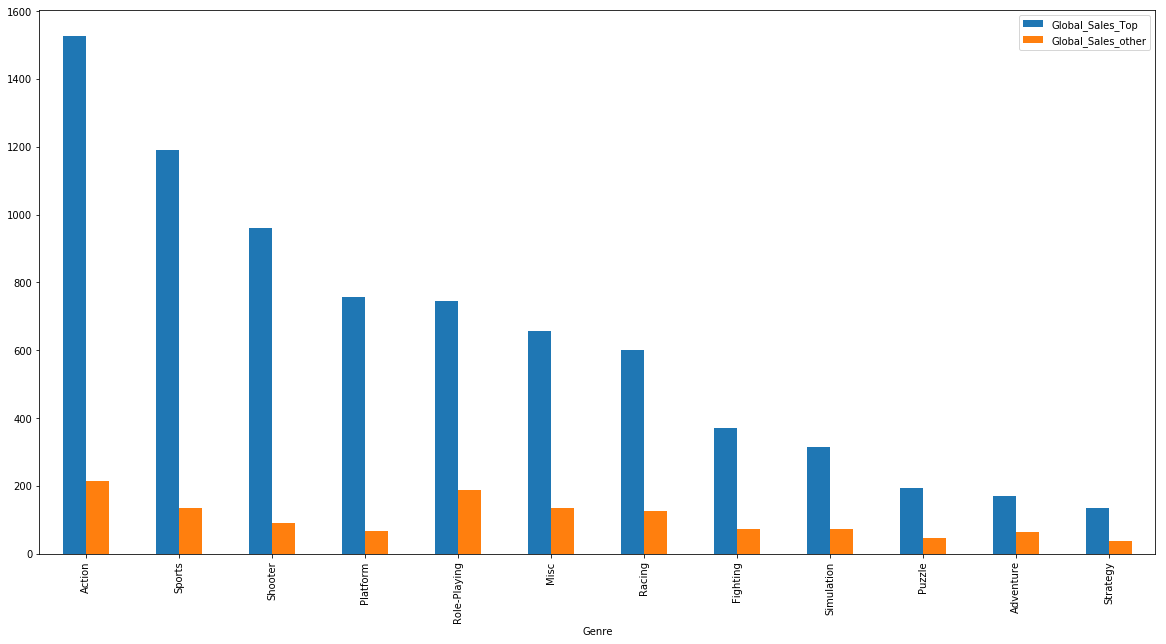

In [50]:
df_comb.plot.bar(figsize = (20,10))
df_comb

На графике приведены объемы продаж в зависимости от жанра игры для 2-ух типов компаний

Видно, какие жанры являются самыми популярными среди компаний (и, соответственно, среди потребителей), а именно: Action, Sports, Shooter. Такое различие в продажах скорее всего связано с "популярностью" или "надежностью" "больших" компаний, а так же популярностью различных игровых серий.

Аналогично посмотрим на связь с игровыми платформами

In [56]:
df_top_platform = pd.DataFrame(df_top.groupby(by='Platform')['Global_Sales'].sum().sort_values(ascending=False))
df_other_platform = pd.DataFrame(df_other.groupby(by='Platform')['Global_Sales'].sum().sort_values(ascending=False))

In [62]:
df_comb = pd.merge(df_top_platform, df_other_platform, on='Platform')
df_comb.rename(columns={'Global_Sales_x':'Global_Sales_Top',
                       'Global_Sales_y':'Global_Sales_other'}, 
                 inplace=True)

,Global_Sales_Top,Global_Sales_other
Platform,,
PS2,1055.20,194.67
X360,901.16,69.66
PS3,855.57,82.70
Wii,810.25,96.73
DS,691.22,112.93
PS,483.87,241.42
PS4,284.17,28.90
GBA,260.81,49.24
PSP,254.01,38.21


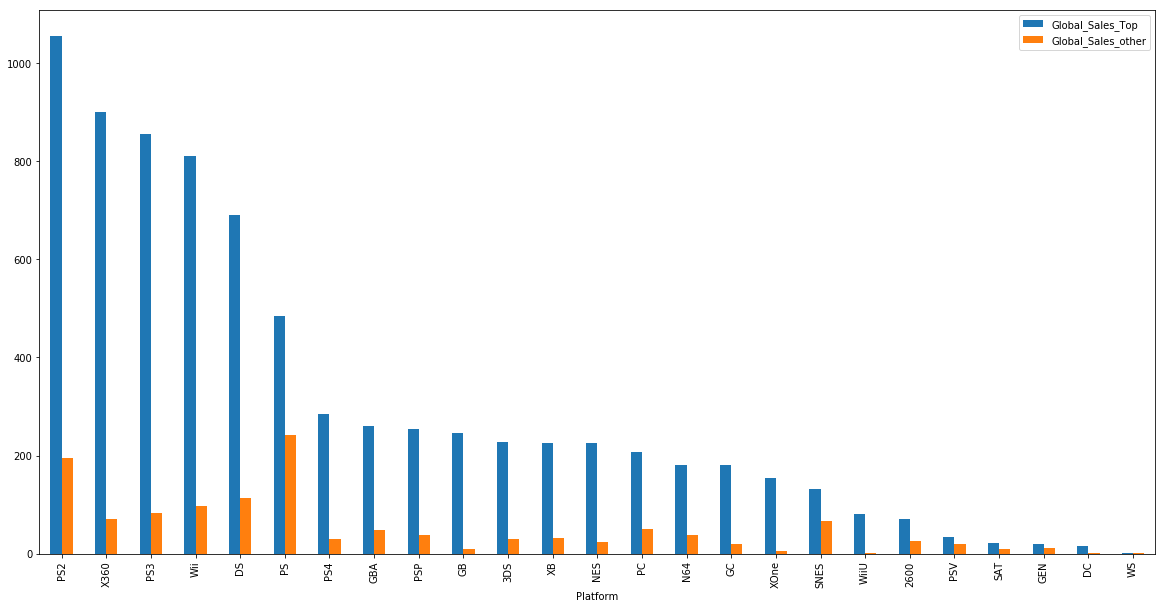

In [63]:
df_comb.plot.bar(figsize = (20,10))
df_comb

Как мы видим, **PS2** имеет самый большой объем продаж. Это связано с тем (если оглядываться на историю видеогейминга), что во времена **PS2** у нее не было сильных конкурентов, а платформа была очень популярна и имела хорошую техническую начинку (так же, к успеху консоли можно приписать множество качественных эксклюзивов, такие как God of War, Ratchet & Clank и т. д.). С выходом нового поколения консолей от тех же Microsoft появилась большая конкуренция, в связи с чем **PS3** уже не имеет такого же большого объема продаж. Так же стоит отметить, что для "маленьких" компаний большой интерес представляла **PS**, при этом отрыв не самый большой между 2-мя типами компаний. Возможно, это связано с тем, что "большие" компании, еще не успели разростись до гигантских размеров, в связи с чем, "маленькие" компании смогли отхватить часть своей аудитории в тот период. 

Посмотрим на изменение продаж:

In [64]:
df_top_time = pd.DataFrame(df_top.groupby('Year_of_Release')
                           ['Global_Sales'].sum().sort_index(ascending=False))
df_other_time = pd.DataFrame(df_other.groupby('Year_of_Release')
                           ['Global_Sales'].sum().sort_index(ascending=False))

In [65]:
df_comb = pd.merge(df_top_time, df_other_time, on='Year_of_Release')
df_comb.rename(columns={'Global_Sales_x':'Global_Sales_Top',
                       'Global_Sales_y':'Global_Sales_other'}, 
                 inplace=True)

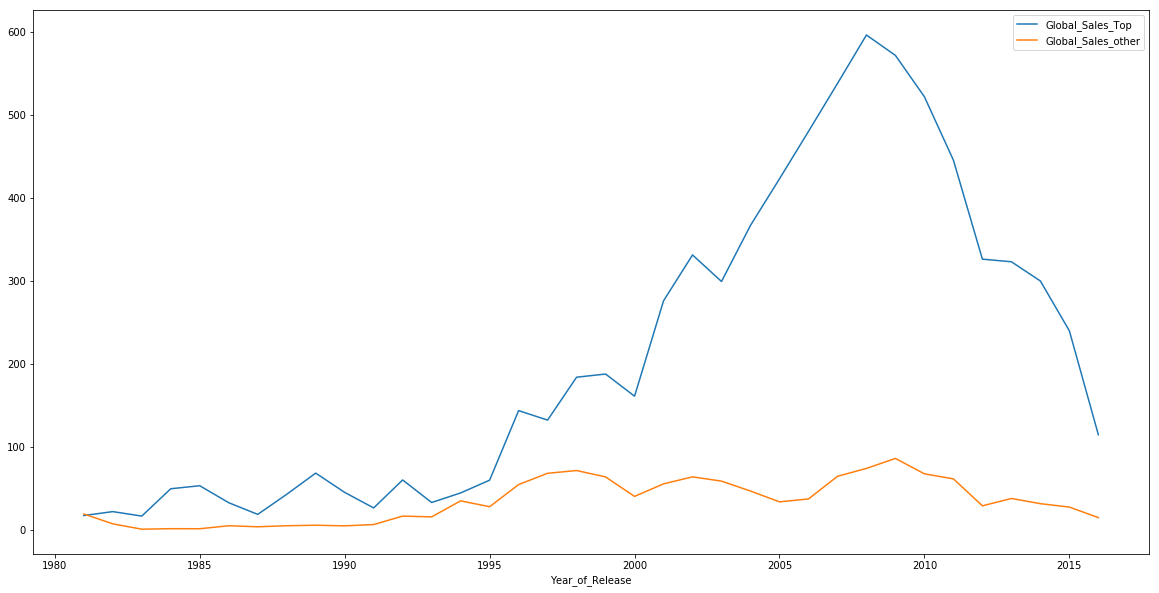

In [68]:
df_comb.plot(figsize = (20,10))

* Большенством "больших" компаний являются те, кто начал свою деятельность в начале 80-ых.

* Объемы продаж начали резко расти в 90ые годы, ответ кроется в истории видеоигр: произошла своеборазная "революция", так как игровые автоматы стали оттесняться (хотя это началось еще с 1985 года, когда появилась приставка NES), начала появляться первая 3D графика и т. д.

Как мы видим, разрыв между "большими" и "маленькими" компаниями происходит в 1990-1995 годах. Скорее всего, "большие" компании смогли адаптироваться к новым технологиям, благодаря чему смогли увеличить свои продажи.

В итоге имеем:

1. Лидеры среди компананий по прадажам игр, как и ожидалось, заняли все части игровой индустрии (в особенности Action, Sports, Shooter). В то же время, для "маленьких" компаний привлекательным жанром, помимо перечисленнных, является Role-Playing.

2. "Маленькие" разработчики хорошо себя чувствовали при разработке игр на PS, но не смогли удержаться на плову при выходе нового поколения консолей.

3. Из-за спада интиреса к играм, "маленьким" компаниям стоит задуматься над эксперементами в жанрах, чтобы пробиться в "высшую лигу".

#### Статистических гипотезы.

Рассмотрим, является ли приставка ****PS3**** такой же популярной для разработчиков в своё время как ****PS**** в своё (оценим популярность разных поколений консолей).

1. Проверим принадлежат ли обе выборки нормальному распределению, для проверки используем критерий *Шапиро-Уилко*.

In [33]:
df_ps = df[df.Platform == 'PS']['Year_of_Release'].value_counts().sort_index(ascending=False)
df_ps = np.array(df_ps)
stats.shapiro(df_ps)

(0.9260306358337402, 0.41000327467918396)

In [37]:
df_ps3 = df[df.Platform == 'PS3']['Year_of_Release'].value_counts().sort_index(ascending=False)
df_ps3 = np.array(df_ps3)
stats.shapiro(df_ps3)

(0.9796549677848816, 0.9642136693000793)

Обе выборки принадлежат нормальному распределению. Тогда т.к мы сравниваем две выборки из нормальных распределений, то мы можем применить *критерий Стьюдента*.

При этом нулевая гипотеза:

$H_0 :$ Для PS3 игры выпускают так же часто, как выпускали и для PS.

Уровень значимости возьмём 5%.

Нарисуем графики.

Text(0.5, 1.0, 'Количество выпущенных игр для PS')

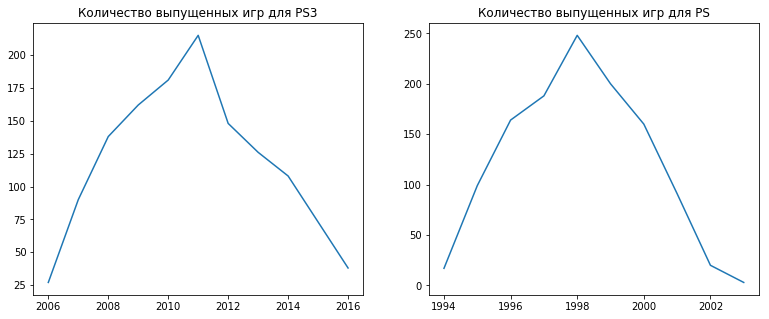

In [84]:
fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_ps3_plot = pd.DataFrame(df[df.Platform == 'PS3']['Year_of_Release'].value_counts().sort_index(ascending=False))
ax1.plot(df_ps3_plot)
ax1.set_title('Количество выпущенных игр для PS3')

df_ps_plot = pd.DataFrame(df[df.Platform == 'PS']['Year_of_Release'].value_counts().sort_index(ascending=False))
ax2.plot(df_ps_plot)
ax2.set_title('Количество выпущенных игр для PS')

In [87]:
stats.ttest_ind(df_ps, df_ps3)

Ttest_indResult(statistic=0.00857063727392926, pvalue=0.9932510562490806)

p > 0.1, значит в нашем случае выборки взяты из одного распределения, и гипотеза верна.

Рассмотрим японских гигантов игровой индустрии, **Sony Computer Entertainment** и **Nintendo**. Обе являются платформо-держателями и сами (отчасти) разрабатывают игры для своих консолей. Сравнивать их продажи нет смысла, так как очевидно, Nintendo выиграет(это вытикает из того факта, что Nintendo владеет популярной франшизой Super mario + для своей приставки Wii игры они разрабатывают практически самостоятельно, в отличии от Sony (самые очевидные примеры это серия Devil may cry и metal gear solid)). Поэтому сравним оценки, которые ставят играм, которые были разработаны самимим компаниями-платформодержателями.

Нулевая гипотеза:

$H_0:$ Игроки играм от **Nintendo** и **Sony Computer Entertainment** ставят похожие оценки.

Уровень значимости возьмём 5%.

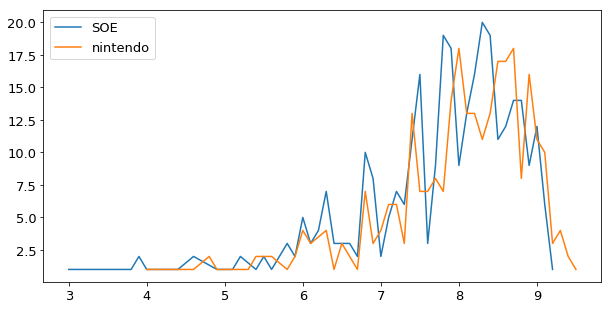

In [53]:
df_nintendo = pd.DataFrame(df[df.Publisher == 'Nintendo']
                        ['User_Score'].value_counts().sort_index(ascending=False))
df_soe = pd.DataFrame(df[df.Publisher == 'Sony Computer Entertainment']
                       ['User_Score'].value_counts().sort_index(ascending=False))
fig, axes = plt.subplots(figsize=(10, 5))
x = np.arange(-np.pi,np.pi,0.05)  
plt.plot(df_soe.User_Score.keys(), df_soe.User_Score.values, label='SOE')
plt.plot(df_nintendo.User_Score.keys(), df_nintendo.User_Score.values, label='nintendo')
plt.legend()
plt.show()

In [54]:
df_nintendo = np.array(df[df.Publisher == 'Nintendo']
                           ['User_Score'].value_counts().sort_index(ascending=False))
df_soe = np.array(df[df.Publisher == 'Sony Computer Entertainment']
                     ['User_Score'].value_counts().sort_index(ascending=False))
print(stats.shapiro(df_nintendo))
print(stats.shapiro(df_soe))
stats.mannwhitneyu(df_nintendo, df_soe)

(0.845344603061676, 1.95337415789254e-05)
(0.8354213237762451, 4.488464583118912e-06)


MannwhitneyuResult(statistic=1200.0, pvalue=0.4395477005966614)

Как мы видим, нулевая гипотеза выполняется, на графиках видно, что большенству игр от обоих издателей ставят в основном положительные оценки(т е дочернии комапнии компаний-платформодержателей выпускают хорошие игры для своих платформ(в основном)).

#### Предскажем временной ряд

Предскажем востребованность консоли playstation на 5 лет вперед.
За основу возьмем все поколения консолей(так как на смену каждой старой консоли приходит новая, отвечающая техническим требованиям своего поколения, поэтому есть логика в том, чтобы рассмотреть все консоли вместе).

In [115]:
df_ps = (df[(df.Platform == 'PS') | (df.Platform == 'PS2') | 
                   (df.Platform == 'PS3') | (df.Platform == 'PS4')] 
                  ['Year_of_Release'].value_counts().sort_index())
df_ps

1994.0     17
1995.0     99
1996.0    164
1997.0    188
1998.0    248
1999.0    200
2000.0    242
2001.0    276
2002.0    300
2003.0    259
2004.0    259
2005.0    260
2006.0    286
2007.0    304
2008.0    329
2009.0    258
2010.0    219
2011.0    222
2012.0    148
2013.0    142
2014.0    183
2015.0    210
2016.0    202
Name: Year_of_Release, dtype: int64

Выбросим первые 2 года (так как компания тогда только появилась, имеет малое кол-во игр, скорее всего, эти строки будут мешать)

In [116]:
 df_ps = df_ps.drop([1994,1995], axis=0)

Проверим ряд на стационарность.

In [144]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    stat_test = adfuller(timeseries)
    print('Critical values: ', stat_test[4])
    if stat_test[0]> stat_test[4]['5%']:
        print('p-value = %.4f. The series is likely stationary.' % stat_test[1])
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % stat_test[1])

In [145]:
df_ps = pd.DataFrame(df_ps)
test_stationarity(df_ps.Year_of_Release)

Critical values:  {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
p-value = 0.9585. The series is likely stationary.


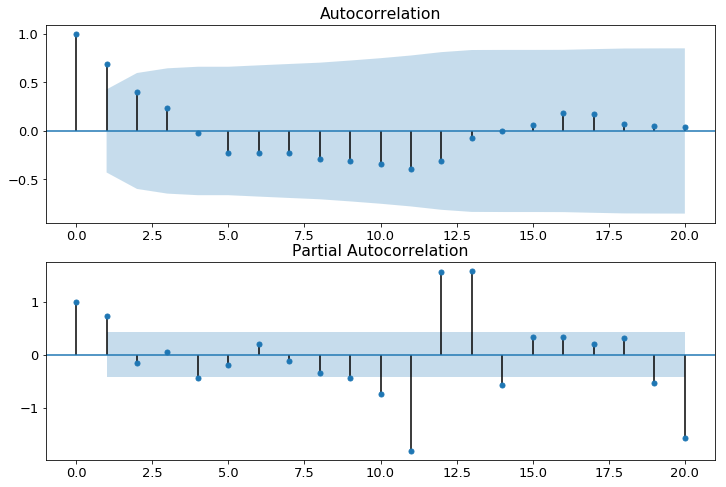

In [123]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_ps.values.squeeze(), lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_ps, lags=20, ax=ax2)

In [126]:
s = 6 #логически можно предположить, что игр ("эксклюзивов") должно выпускаться больше при запуске новой консоли
d = 1 # есть дифференцирование
D = 0 # не сезонного дифференцирования

p = 1 # только первый лаг отличен от 0 (если смотреть все, то появляются лаги в конце, поэтому возьмем самый последний 
#из первых, чтобы не перегружать модель)
P = 3 # возьмем 3 сезонный лаг

q = 1
Q = 0

In [127]:
best_model=sm.tsa.statespace.SARIMAX(df_ps.Year_of_Release.squeeze(), order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit()

/home/maxim/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [134]:
forecast = best_model.predict(start = df_ps.shape[0], end = df_ps.shape[0]+4)
forecast.index = range(2016, 2021)
forecast

2016    222.103909
2017    237.736343
2018    170.726082
2019    126.965214
2020    172.858008
dtype: float64

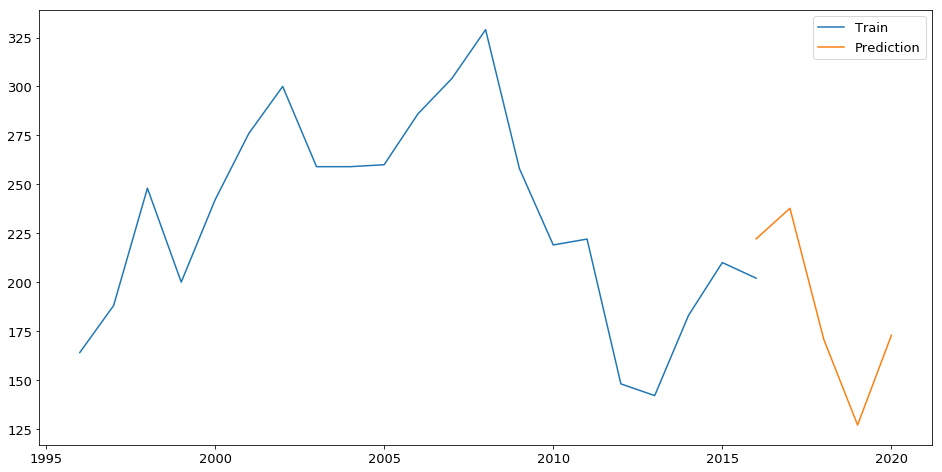

In [135]:
plt.figure(figsize=(16,8))
plt.plot(df_ps.Year_of_Release.squeeze(), label='Train')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

Вывод:

* Внимание к игром начало уменьшаться (скорее всего из-за однотипности жанров и идей), в связи с чем инди-разработчики могут смело эксперементировать, чем могут заработать популярность.

* Из 1 статистического теста можно выявить, что консоли **PS3** и **PS** востребованы довольно таки одинаково для своего времени (что может означать, что **PS3** уступает своей предшествиннеце **PS2** в плане успешности).

* Из 2 статистического теста можно понять, что Sony и Nintendo не пускают все на самотек и сами во многих случаях подогревают интерес к своим консолям с помощью различных эксклюзивов.

* Из предсказания временного ряда можно сказать, начиная с 2018 года количество игр немного упадет.